<a href="https://colab.research.google.com/github/raulrosapacheco/Campanhas-Telemarketing-Financeiras/blob/main/MarketingFinanceira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Campanhas de Marketing Direto (Instituição Bancária)

## Carregando os Pacotes

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Carregando os Dados

In [2]:
# Carrega o DataSet bank-full.csv disponível no GitHub
df = pd.read_csv('https://raw.githubusercontent.com/raulrosapacheco/Campanhas-Telemarketing-Financeiras/main/dados/bank-full.csv', sep=';')

In [3]:
# Número de Registros e Variáveis
df.shape

(45211, 16)

In [4]:
# Amostra do DataSet
df.head()

,"job,age",education,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,"management,58",tertiary,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,"technician,44",secondary,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,"entrepreneur,33",secondary,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,"blue-collar,47",unknown,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,"unknown,33",unknown,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Análise Exploratória

In [5]:
# Verificar os tipos de dados das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job,age    45211 non-null  object
 1   education  45211 non-null  object
 2   marital    45211 non-null  object
 3   default    45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45171 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45193 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [6]:
# Quantidade de valores nulos
df.isna().sum()

job,age       0
education     0
marital       0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month        40
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y            18
dtype: int64

Já é possível identificar que a coluna job,age possuem duas informações, portanto é necessário separá-las.

In [7]:
# Separando a coluna 'job,age'
df[['job', 'age']] = df['job,age'].str.split(',', expand=True)
df = df.drop(columns=['job,age'], axis =1)

# Deletando espaços em branco das colunas 'job' e 'age'
df['job'] = df['job'].apply(lambda x: x.strip())
df['age'] = df['age'].apply(lambda x: x.strip())

# Substitua valores vazios por NaN
df['job'].replace('', np.nan, inplace=True)
df['age'].replace('', np.nan, inplace=True)

# Reordenar coluna
new_order = ['job', 'age', 'education', 'marital', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df.reindex(columns=new_order)

# Amostra
df.head()

,job,age,education,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,management,58,tertiary,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,technician,44,secondary,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,entrepreneur,33,secondary,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,blue-collar,47,unknown,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,unknown,33,unknown,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Verificando novamente a quantidade de valores nulos após a divisão
df.isna().sum()

job           0
age          15
education     0
marital       0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month        40
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y            18
dtype: int64

## Tratamento de Valores Ausentes da Variável 'age'

In [9]:
# Valores únicos e tipologia 
df['age'].unique()

array(['58', '44', '33', '47', '35', '28', '42', '43', '41', '29', '53',
       '57', '51', '45', '60', '56', '32', '25', '40', '39', '52', '46',
       '36', nan, '55', '54', '48', '24', '38', '49', '59', '31', '30',
       '27', '34', '23', '37', '26', '50', '61', '22', '0', '21', '20',
       '66', '62', '83', '75', '67', '70', '65', '68', '64', '69', '72',
       '71', '19', '76', '85', '63', '90', '82', '73', '74', '78', '80',
       '94', '79', '77', '86', '95', '81', '18', '89', '84', '87', '92',
       '93', '88'], dtype=object)

É possível observar que na coluna 'age' (idade), além dos valores nulos existem registros com idade igual a '0'.

Existe cliente bancário com idade igual a '0'?

Portanto iremos transformar todos os registros com idade igual a '0' para valores nulos.

In [10]:
# Transformando idade igual a '0' para valor nulo
df['age'] = df['age'].replace('0', np.nan)

In [11]:
# Mudar o tipo da coluna 'age' para int, com o objetivo de criar um histograma e um boxplot
df['age'] = df['age'].astype(float).fillna(float('nan')).astype('Int64')

In [12]:
# Verificando percentual de valores ausentes
df['age'].isna().mean() * 100

0.05529627745460176

O percentual de valores ausentes da coluna 'age' é muito baixo. Seria viável eliminar os registros com valores ausentes ou aplicar imputação. Irei optar por aplicar imputação por uma das medidas de tendência central.

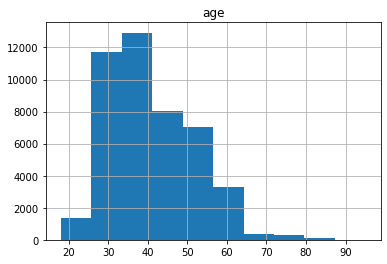

In [13]:
# Criar um histograma da coluna "age"
df.hist(column='age')
plt.show()

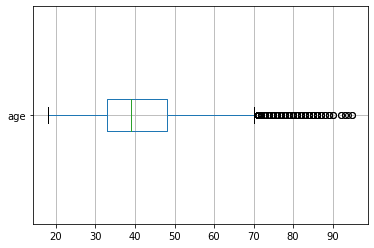

In [14]:
# Criar um boxplot da coluna "age"
df.boxplot(column='age', vert=False)
plt.show()

In [15]:
df['age'].unique()

<IntegerArray>
[  58,   44,   33,   47,   35,   28,   42,   43,   41,   29,   53,   57,   51,
   45,   60,   56,   32,   25,   40,   39,   52,   46,   36, <NA>,   55,   54,
   48,   24,   38,   49,   59,   31,   30,   27,   34,   23,   37,   26,   50,
   61,   22,   21,   20,   66,   62,   83,   75,   67,   70,   65,   68,   64,
   69,   72,   71,   19,   76,   85,   63,   90,   82,   73,   74,   78,   80,
   94,   79,   77,   86,   95,   81,   18,   89,   84,   87,   92,   93,   88]
Length: 78, dtype: Int64

Analisando o histograma e o boxplot da variável 'age' é possivel perceber uma assimetria nos dados e diversos valores outliers. 

In [16]:
# Calcular a média da coluna 'age'
media = df['age'].mean()

# calcular a mediana da coluna 'B'
mediana = df['age'].median()

# calcular a moda da coluna 'B'
moda = df['age'].mode()[0]

# imprimir os resultados
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Média: 40.933054485902716
Mediana: 39.0
Moda: 32


In [17]:
# Verificando percentual de valores ausentes
df['age'].isna().mean() * 100

0.05529627745460176

Os dados parecem assimetricos, sendo assim a média não deveria ser usada, além disse a moda está muito abaixo da media e da mediana. Se imputar a moda, estaria reforçando essa informação.

Portanto, os valores ausentes da variáveis 'age' serão preenchidos pela mediana.

In [18]:
# Preencher os valores ausentes da coluna 'age' com a moda
df['age'].fillna(mediana, inplace=True)

## Tratamento de Valores Ausentes da Variável 'month'

In [19]:
# Quantidade de valores ausentes da coluna 'month'
df['month'].isnull().sum()

40

In [20]:
# Percentual de valores ausentes da coluna 'month'
df['month'].isnull().mean() * 100

0.0884740439273628

Por decisão de negócio, irei preencher os valores ausentes da variável 'month' com a moda. 

A variável month é do tipo categórica, portanto não existe cálculo de média e mediana para variáveis categóricas.

In [21]:
# calcular a moda da coluna 'month'
moda = df['month'].mode()[0]

# preencher os valores ausentes da coluna 'B' com a moda
df['month'].fillna(moda, inplace=True)

In [22]:
# Percentual de valores ausentes da coluna 'month'
df['month'].isnull().mean() * 100

0.0

## Tratamento de Valores Ausentes da Variável 'y' (variável alvo)
Essa variável indica se o cliente aderiu ou não ao produto bancário.

In [23]:
# Quantidade de valores ausentes da variável alvo
df['y'].isnull().sum()

18

In [24]:
# Percentual de valores ausentes da variável alvo
df['y'].isnull().mean() * 100

0.03981331976731326

Não se aplica técnicas de imputação em uma variável alvo, o mais indicado neste caso é deletar os registros que contém valor ausente na variável alvo.

In [25]:
# Deletar os registros que contêm valor ausente na coluna 'y'
df = df.dropna(subset=['y'])

In [26]:
# Quantidade de valores ausentes da variável alvo
df['y'].isnull().sum()

0

## Tratamento de Valores Ausentes da Variável 'pdays'
O dicionário de dados informa que nesta colunas, valores -1 indicam valores ausentes.

In [27]:
# Substituir os valores -1 da coluna 'pdays' por NaN
df['pdays'] = df['pdays'].replace(-1, np.nan)

In [28]:
# Percentual de valores ausentes na coluna 'pdays'
df['pdays'].isna().mean() * 100

81.7294713783108

A coluna 'pdays' possui quase 82% de valores ausentes, portando é indicado deletar a coluna da análise.

In [29]:
# Dropar a coluna 'pdays'
df = df.drop('pdays', axis=1)

In [30]:
df.isna().sum()

job          0
age          0
education    0
marital      0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64

## Análise da Variável: 'age'

In [31]:
# Calcular o valor máximo de coluna 'age'
valor_maximo = df['age'].max()
print('Valor máximo: ', valor_maximo)

# Calcular o valor mínimo da coluna 'age'
valor_minimo = df['age'].min()
print('Valor minimo: ', valor_minimo)

Valor máximo:  95
Valor minimo:  18


In [32]:
# Criar uma lista de intervalos para cada faixa etária
faixas_etarias = [18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 95]

# Criar uma lista de rótulos para cada intervalo
nomes_faixas_etarias = ['18-23', '24-29', '30-35', '36-41', '42-47', '48-53', '54-59', '60-65', '66-71', '72-77', '78-83', '84-89', '90-95']

# Adicionar uma nova coluna com a faixa etária
df['age_group'] = pd.cut(df['age'], bins=faixas_etarias, labels=nomes_faixas_etarias)

df.head()


,job,age,education,marital,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,age_group
0,management,58,tertiary,married,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no,54-59
1,technician,44,secondary,single,no,29,yes,no,unknown,5,may,151,1,0,unknown,no,42-47
2,entrepreneur,33,secondary,married,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no,30-35
3,blue-collar,47,unknown,married,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no,42-47
4,unknown,33,unknown,single,no,1,no,no,unknown,5,may,198,1,0,unknown,no,30-35


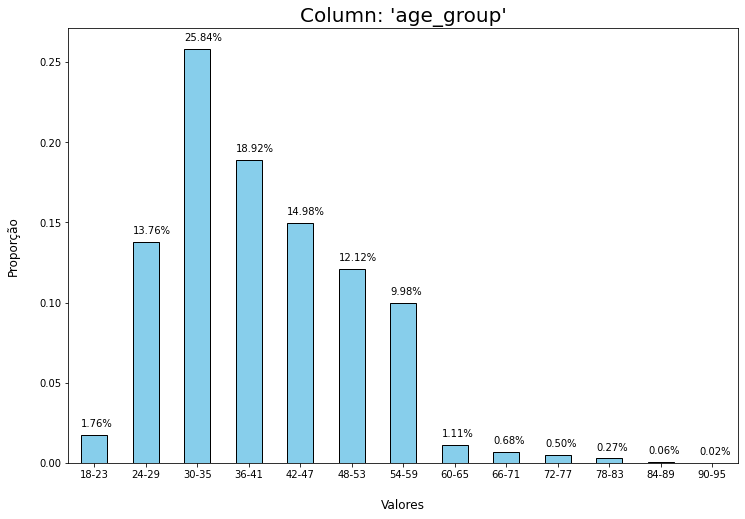

In [33]:
# Proporção da Variável 'age_group'
proporcao = df['age_group'].value_counts(normalize=True)

proporcao = proporcao.reindex(nomes_faixas_etarias)

ax = proporcao.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(12,8))

ax.set_title("Column: 'age_group'", fontsize=20)
ax.set_xlabel('\nValores', fontsize=12)
ax.set_ylabel('Proporção\n', fontsize=12)


# Adicionar proporção acima de cada barra
for i, v in enumerate(proporcao):
    ax.text(i-0.25, v+0.005, '{:.2%}'.format(v), fontsize=10)

plt.xticks(rotation=0)

plt.show()

## Análise da Variável: 'job'

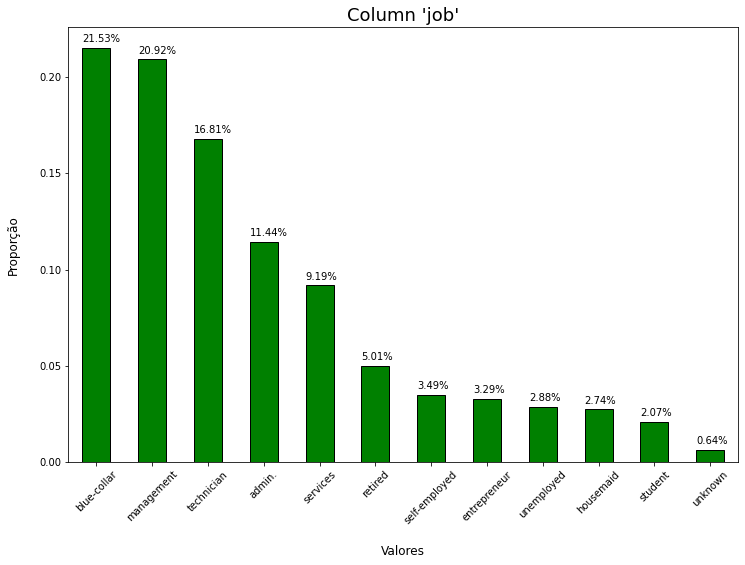

In [34]:
# Proporção da Variável 'job'
proporcao = df['job'].value_counts(normalize=True)

ax = proporcao.plot(kind='bar', color='green', edgecolor='black', figsize=(12,8))

ax.set_title("Column 'job'", fontsize=18)
ax.set_xlabel('\nValores', fontsize=12)
ax.set_ylabel('Proporção\n', fontsize=12)


# Adicionar proporção acima de cada barra
for i, v in enumerate(proporcao):
    ax.text(i-0.25, v+0.003, '{:.2%}'.format(v), fontsize=10)

plt.xticks(rotation=45)

plt.show()

## Análise da Variável: 'education'

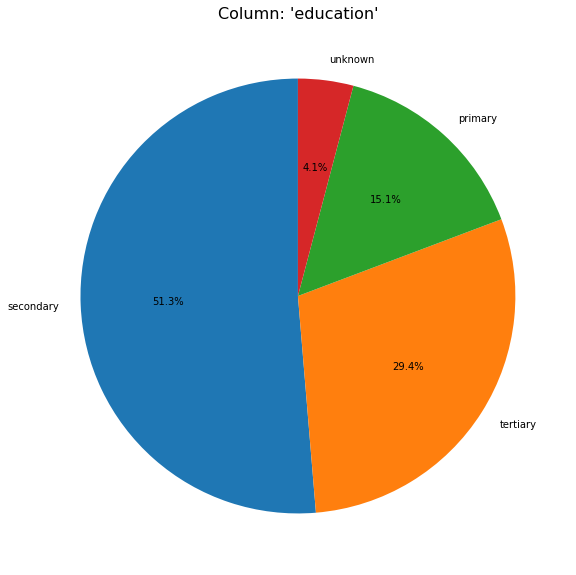

In [35]:
# contar o número de ocorrências de cada valor na coluna 'education'
counts = df['education'].value_counts()

# criar um gráfico de pizza com a proporção de cada valor
fig, ax = plt.subplots(figsize=(10, 10)) # definir tamanho do gráfico
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90) # adicionar argumentos para personalizar o gráfico
ax.set_title("Column: 'education'", fontsize=16) # adicionar título

# exibir o gráfico
plt.show()

## Análise da Variável: 'marital'

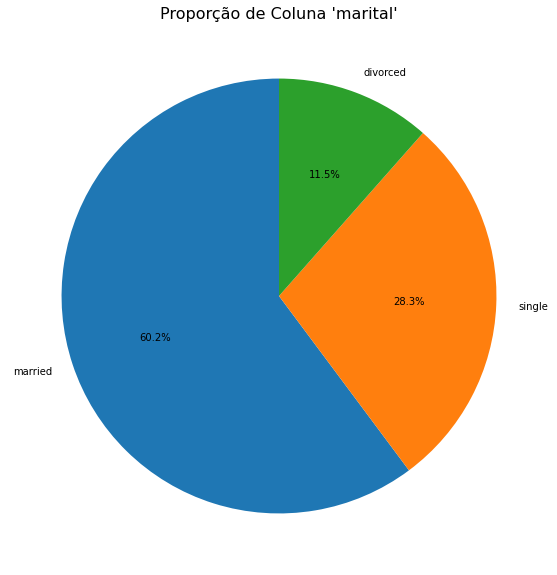

In [36]:
# contar o número de ocorrências de cada valor na coluna 'marital'
counts = df['marital'].value_counts()

# criar um gráfico de pizza com a proporção de cada valor
fig, ax = plt.subplots(figsize=(10, 10)) # definir tamanho do gráfico
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90) # adicionar argumentos para personalizar o gráfico
ax.set_title("Proporção de Coluna 'marital'", fontsize=16) # adicionar título

# exibir o gráfico
plt.show()

## Análise da Variável Alvo: 'y'

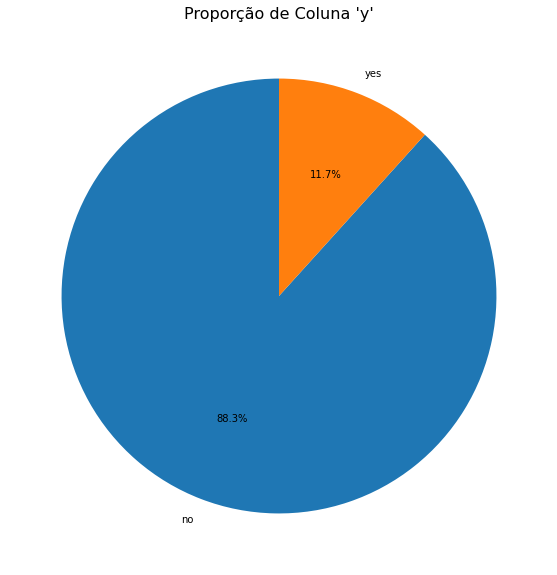

In [37]:
# contar o número de ocorrências de cada valor na coluna 'y'
counts = df['y'].value_counts()

# criar um gráfico de pizza com a proporção de cada valor
fig, ax = plt.subplots(figsize=(10, 10)) # definir tamanho do gráfico
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90) # adicionar argumentos para personalizar o gráfico
ax.set_title("Proporção de Coluna 'y'", fontsize=16) # adicionar título

# exibir o gráfico
plt.show()

In [38]:
# Modifica a coluna 'y' para o tipo numérico onde response "yes"= 1, "no"= 0
df["y"] = np.where(df["y"] == "yes",1,0)
df.head()

,job,age,education,marital,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,age_group
0,management,58,tertiary,married,no,2143,yes,no,unknown,5,may,261,1,0,unknown,0,54-59
1,technician,44,secondary,single,no,29,yes,no,unknown,5,may,151,1,0,unknown,0,42-47
2,entrepreneur,33,secondary,married,no,2,yes,yes,unknown,5,may,76,1,0,unknown,0,30-35
3,blue-collar,47,unknown,married,no,1506,yes,no,unknown,5,may,92,1,0,unknown,0,42-47
4,unknown,33,unknown,single,no,1,no,no,unknown,5,may,198,1,0,unknown,0,30-35


## Análise Multivariada

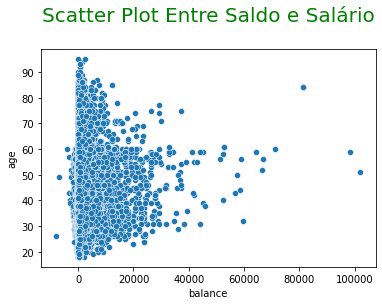

In [39]:
# Scatter Plot: Saldo e Idade
sns.scatterplot(df["balance"], df["age"])
plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

Pelo gráfico não conseguimos perceber uma relação linear clara entre as a idade e o saldo bancário, entretanto existe um pequeno padrão entre as variáveis. 

A medida que a idade aumenta parece haver um pequeno aumento no saldo bancário.

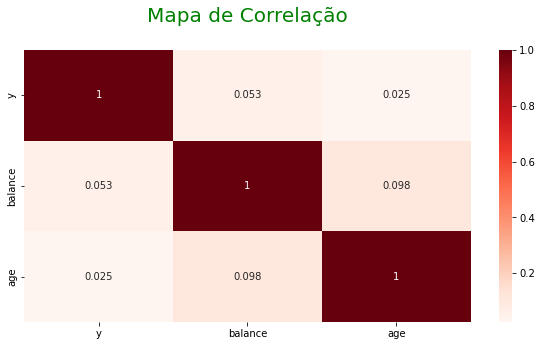

In [40]:
# Correlação entre as variáveis 'y', 'balance' e 'age'

# Calcula a correlação
res = df[["y", "balance", "age"]].corr()

# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

A correlação é um coeficiente entre -1 e +1, sendo +1 uma alta correlação positiva, -1 uma alta correlação negativa e próximo de zero não há correlação.


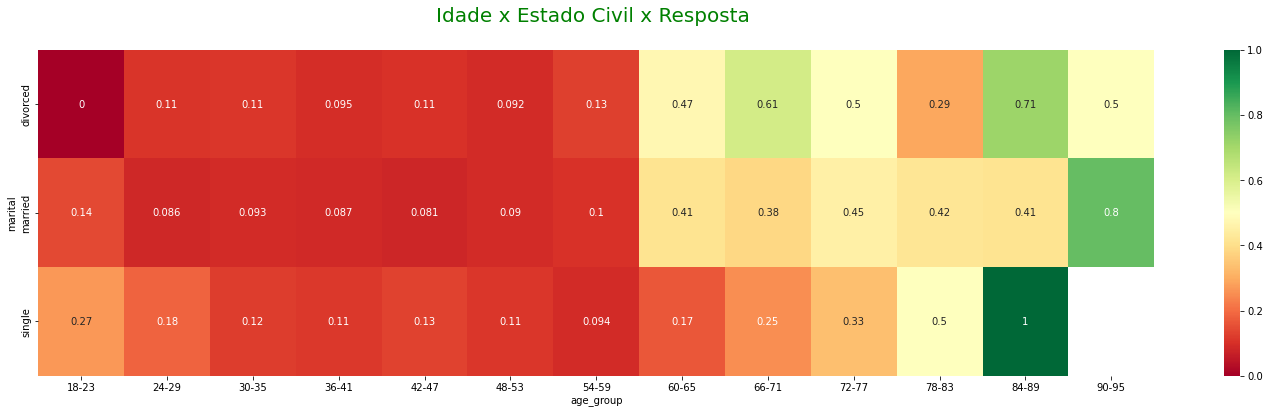

In [42]:
# Mapa de correlação
plt.figure(figsize=(25, 6))
res1 = df.pivot_table(index = "marital", columns = "age_group", values = "y", aggfunc = "mean")
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.title("Idade x Estado Civil x Resposta \n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

Através deste gráfico de correlação entre as variáveis alvo 'y', estado civil 'marital' e 'idade' é possível concluir que as pessoas acima dos 60 anos foram as que mais adquiriram o produto bancário. 

Além disso, nessa mesma faixa etária(60+) , se o cliente for casado existe uma maior probabilidade de ter adquirido o produto do que se este for solteiro e, do mesmo modo, se o cliente for divorciado aumenta ainda mais a chance de ele ter adquirido o produto bancário.
